# Manipuler des images
Dans cette feuille, vous allez apprendre à effectuer quelques manipulations simples sur les images. Nous avons besoin de charger quelques bibliothèques:

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

Une collection d'images est fournie dans le dossier [mini-dataset](mini-dataset/) de ce TP; consultez-la.

Nous allons examiner une première de ces images. Pour cela, nous précisons le nom du fichier la contenant, puis la chargeons, et enfin l'affectons à une variable pour pouvoir la nommer aisément par la suite:

In [68]:
img = Image.open("mini-dataset/a01.png")

Voici cette image:

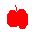

In [69]:
img

Pour l'afficher en plus grand, on peut faire:

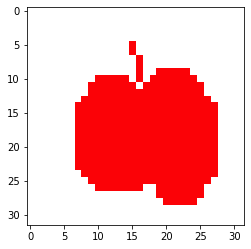

In [70]:
plt.imshow(img)

Comme on peut le lire sur les échelles, cette image est de taille 32 par 32:

In [71]:
img.size

(32, 32)

Exercice:
1. Charger la deuxième image ("a2") et stockez la dans la variable img2
3. Afficher la en petit et en grand
4. Vérifier que les deux images ont la même taille

In [74]:
### BEGIN SOLUTION
img2 = Image.open("mini-dataset/a02.png")
### END SOLUTION

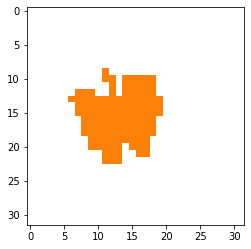

In [75]:
### BEGIN SOLUTION
plt.imshow(img2)
### END SOLUTION

In [76]:
### BEGIN SOLUTION
img.size == img2.size
### END SOLUTION

True

## Images comme tableaux
On souhaite maintenant pouvoir accéder au contenu de l'image: par exemple, quelle est la couleur de tel pixel? Pour cela, nous allons convertir l'image en un tableau de nombres. En Python, de tels tableaux peuvent être représentés avec `np.array`. Voir la [fiche dédiée sur les tableaux](02-tableaux.ipynb).

Voici le tableau associé à l'image:

In [77]:
M = np.array(img)

En vous référant au cours, combien de lignes, de colonnes et de couches devrait avoir ce tableau? Vérifier avec `shape`.

In [81]:
### BEGIN SOLUTION
M.shape
### END SOLUTION

(32, 32, 4)

Pourquoi quatre couches? Rouge, Vert, Bleu, ... et transparence.

On peut récupérer la couleur d'un pixel à partir de ses coordonnées avec:

In [85]:
M[3,5]

array([255, 255, 255, 255], dtype=uint8)

Déterminer la couleur du pixel en haut à gauche et du pixel du milieu:

In [88]:
### BEGIN SOLUTION
M[0,0]
### END SOLUTION

array([255, 255, 255, 255], dtype=uint8)

In [89]:
### BEGIN SOLUTION
M[15,15]
### END SOLUTION

array([251,   2,   7, 255], dtype=uint8)

Retrouvez les couleurs de l'image à l'aide du composant de choix de couleur ci-dessous (cliquez sur le carré de couleur), et vérifiez la cohérence avec les résultats ci-dessus.

ColorPicker(value='black')

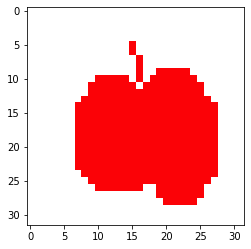

In [96]:
plt.imshow(M)
import ipywidgets
ipywidgets.ColorPicker()

## Séparation des couleurs
Nous pouvons maintenant extraire facilement les trois canaux. Voici le canal des rouges, sur lequel on distingue à peine la pomme:

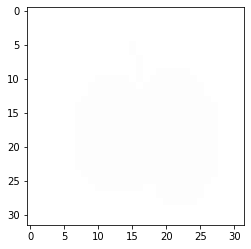

In [115]:
R = M[:,:,0]

plt.imshow(R, cmap='Greys_r', vmin=0, vmax=255)

Extraire et afficher de même le canal des verts et des bleus

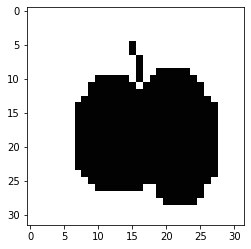

In [119]:
### BEGIN SOLUTION
G = M[:,:,1]

plt.imshow(G, cmap='Greys_r',vmin=0,vmax=255)
### END SOLUTION

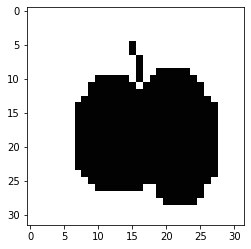

In [120]:
### BEGIN SOLUTION
B = M[:,:,2]

plt.imshow(G, cmap='Greys_r',vmin=0,vmax=255)
### END SOLUTION

Il est maintenant facile de faire de l'arithmétique sur tous les pixels. Par exemple la somme des intensités  en vert et rouge s'écrit:

In [122]:
G + R

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

### Exercice
1. Calculer et visualizer la luminosité de chaque pixel de l'image, la *luminosité* d'un pixel $(r,g,b)$ étant définie comme la moyenne $v=\frac{r+g+b}{3}$:

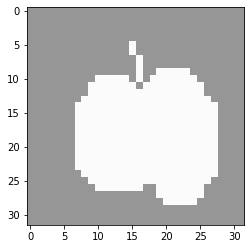

In [139]:
### BEGIN SOLUTION
V = (R+G+B)/3
plt.imshow(L, cmap='Greys_r',vmin=0,vmax=255)
### END SOLUTION

2. De même, calculer et visualiser la rougeur de chaque pixel, la *rougeur* d'un pixel $(r,g,b)$ étant définie par $d=r - \frac{g+b}{2}$:

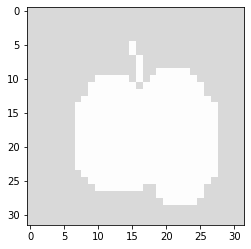

In [133]:
### BEGIN SOLUTION
D = R - (G+B)/2
plt.imshow(L, cmap='Greys_r',vmin=-255,vmax=255)
### END SOLUTION

3. Pourquoi avoir défini la rougeur de cette manière?

## Extraction de la caractéristique «rougeur»
On souhaite maintenant extraire de l'image une caractéristique se résumant à un seul nombre.
### Exercice
Calculer la rougeur moyenne des pixels de l'image. Attention: on ne veut pas tenir compte des pixels du fond.
**Indication:** si S et T sont des tableaux, `S[T!=10]` sélectionne les cases de `S` où `T` ne vaut pas 10. 

In [135]:
### BEGIN SOLUTION
redness = np.mean(D[V!=255])
redness
### END SOLUTION

246.5

## Extraction of the `elongation` feature
Create two mean vectors `V0` and `V1` by averaging (taking the mean) of `V` along axis 0 and axis 1 respectively. Then use this line of code `V0_idx = [i for i in range(imw) if V0[i]!=255]` to get the indices of the values that are not white along axis 0 (horizontal). Similarly write code to extract `V1_idx` (pixels not white along axis 2, vertical). Extract for thos information the witdth `w` and the height `h` of the apple. Visuallt check that the width and height are correct. Finally compute the `elongation` variable (aspect ratio) as `w/h`.

In [138]:
### BEGIN SOLUTION
V0 = np.mean(V, axis=0)
V1 = np.mean(V, axis=1)
V0_idx = [i for i in range(imw) if V0[i]!=255]
V1_idx = [i for i in range(imh) if V1[i]!=255]
w = max(V0_idx)-min(V0_idx)
h = max(V1_idx)-min(V1_idx)
elongation = w/h 
print(w, h, elongation)
### END SOLUTION

20 23 0.8695652173913043
